In [24]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn import datasets

In [25]:
iris = datasets.load_iris()

In [26]:
flowers = set(iris.target)
fields = [0, 1, 2, 3]

In [27]:
field_combs = []
combinations = []
for field in itertools.combinations(fields, 2):
    field_combs.append(field)
    for flower in itertools.combinations(flowers, 2):
        combination = field, flower
        combinations.append(combination)

print "There are {} existing combinations for field and flower \n".format(len(combinations))

There are 18 existing combinations for field and flower 



### Run SVMs along with the visualization from the Overviewfor all the combinations of fields, for each combination of flower types.

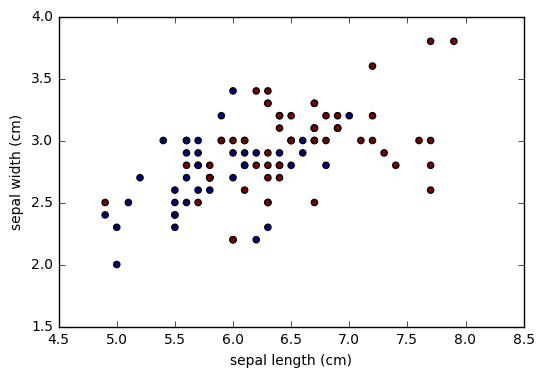

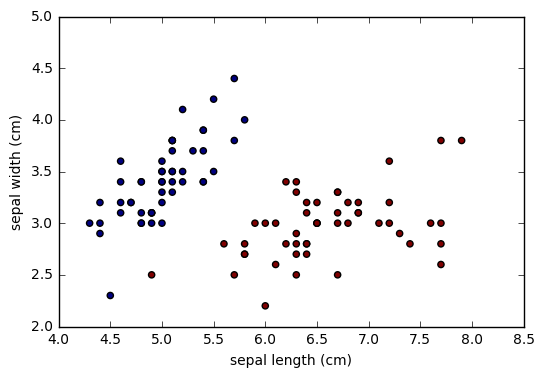

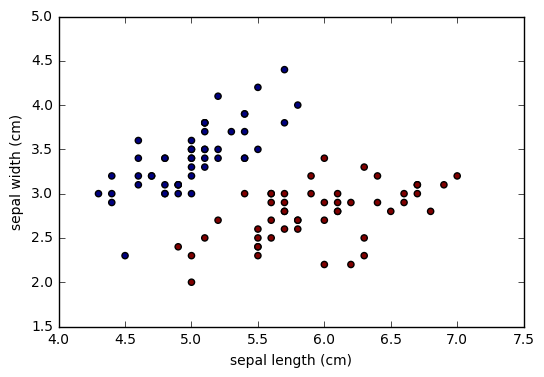

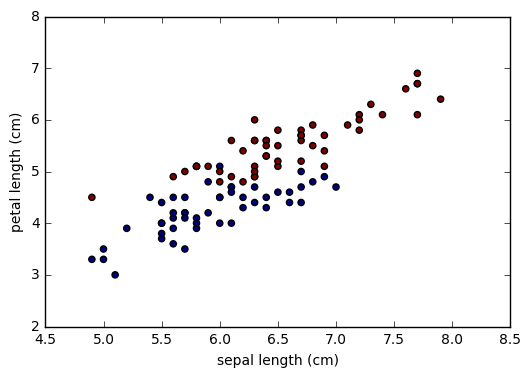

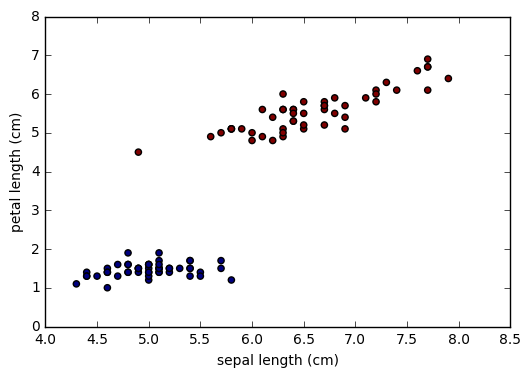

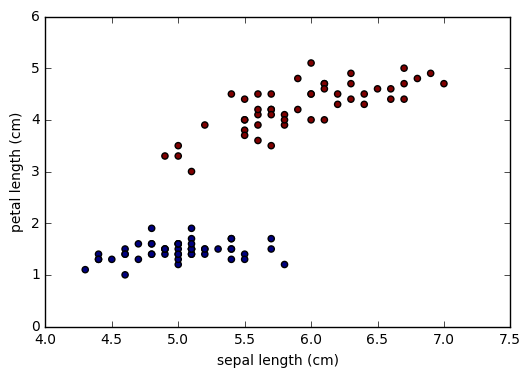

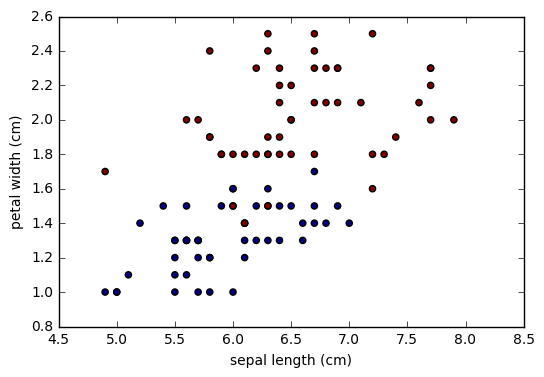

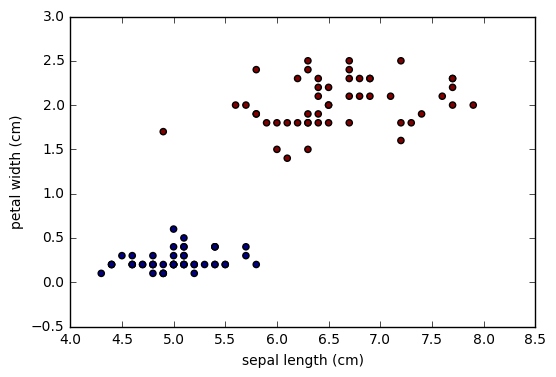

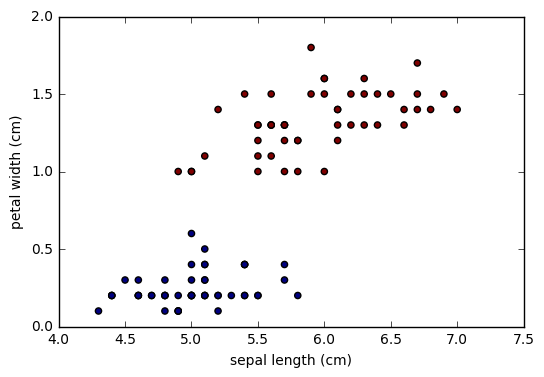

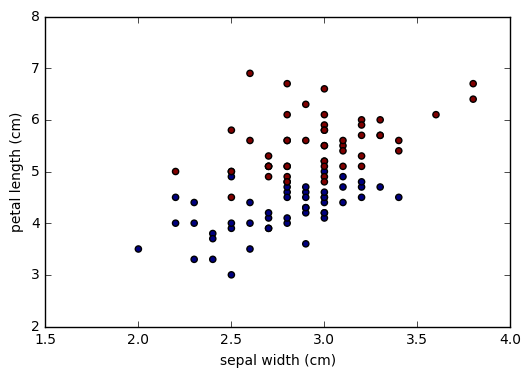

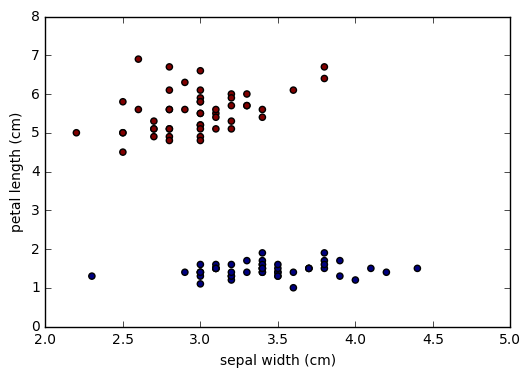

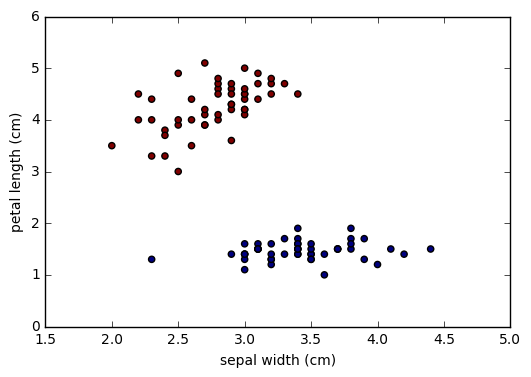

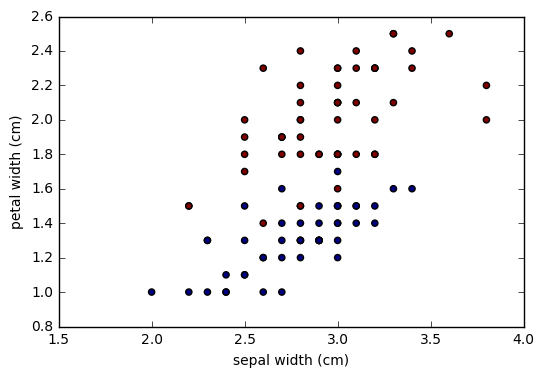

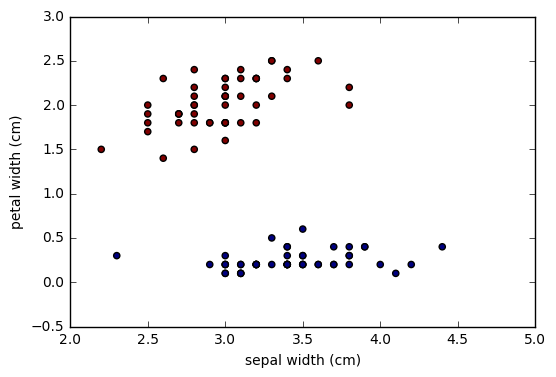

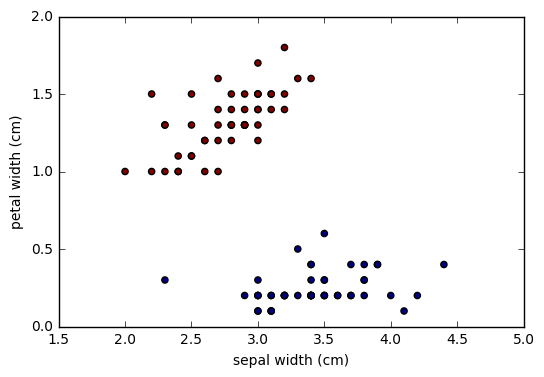

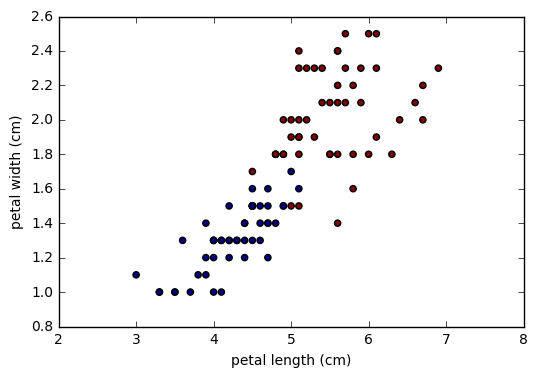

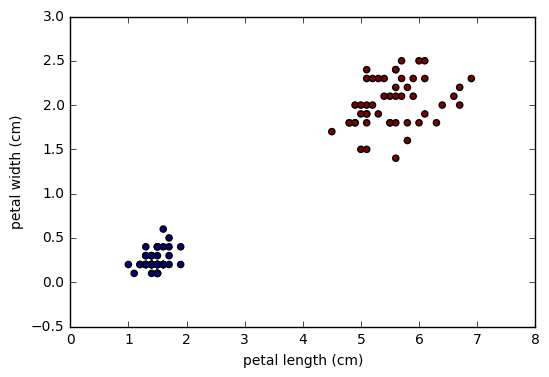

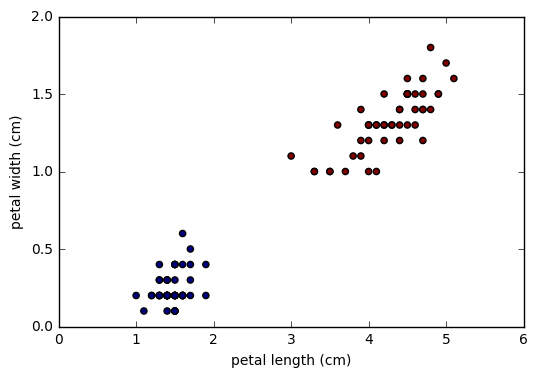

In [28]:
for field in field_combs:
    for flower in flowers:
        plt.scatter(iris.data[iris.target!=flower, field[0]], iris.data[iris.target!=flower, field[1]], c=iris.target[iris.target!=flower])
        plt.xlabel(iris.feature_names[field[0]])
        plt.ylabel(iris.feature_names[field[1]])
        plt.show() 

In [29]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_estimator(estimator, X, y):
    estimator.fit(X, y)
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()
    
    plt.show()

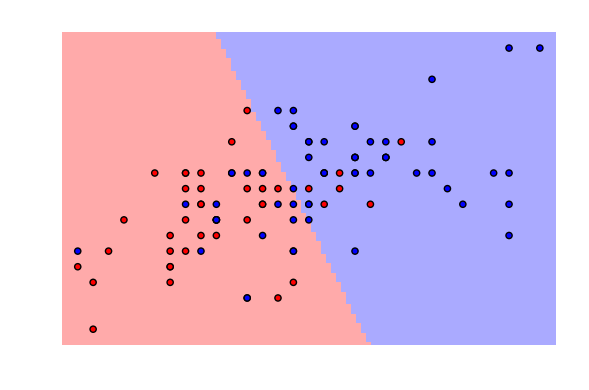

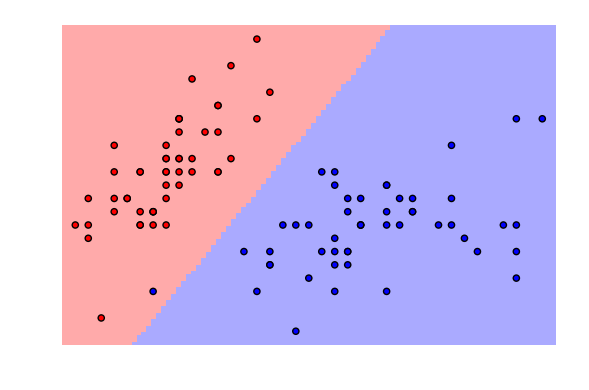

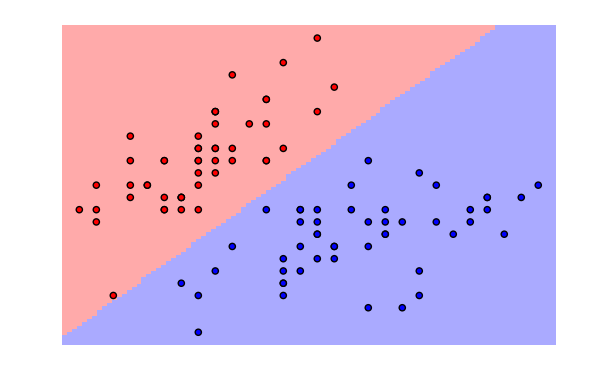

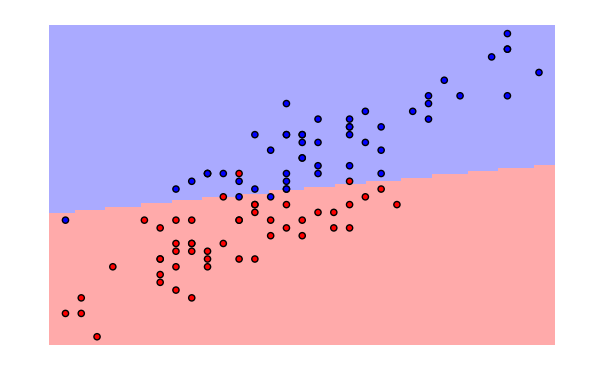

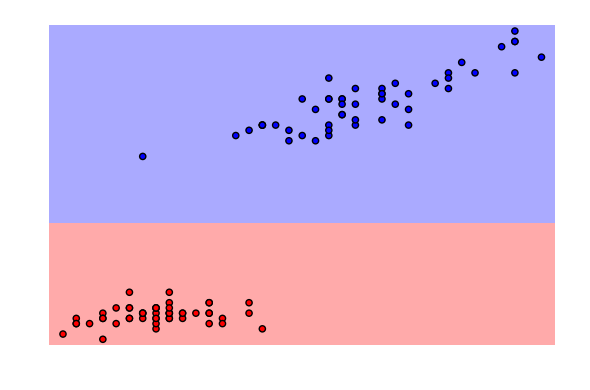

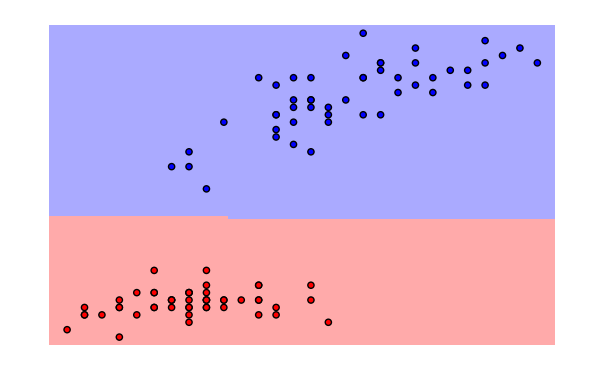

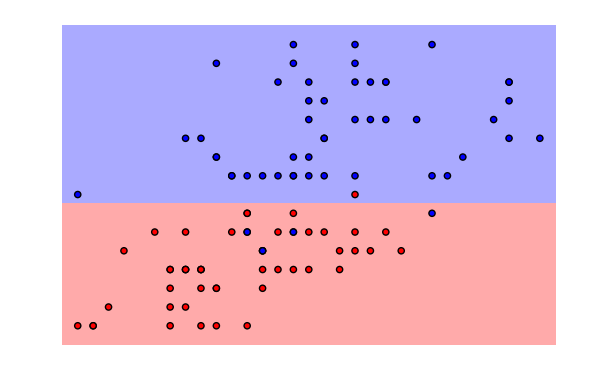

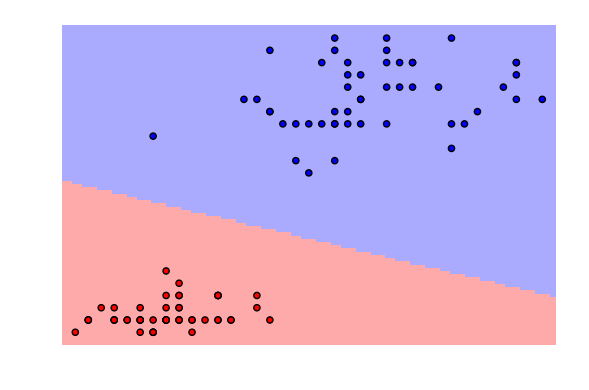

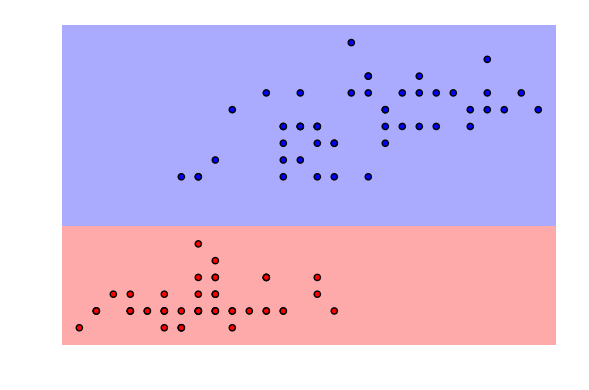

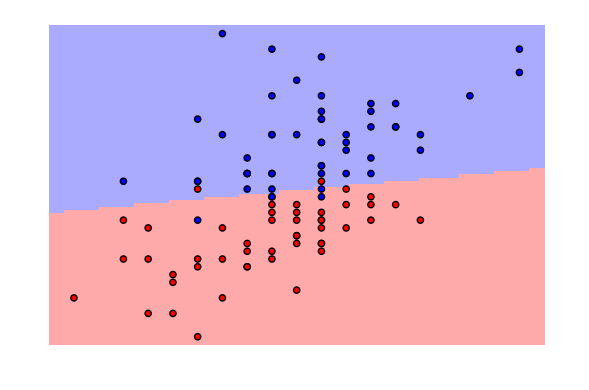

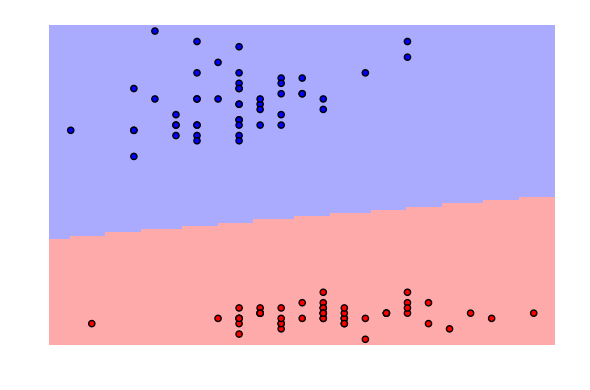

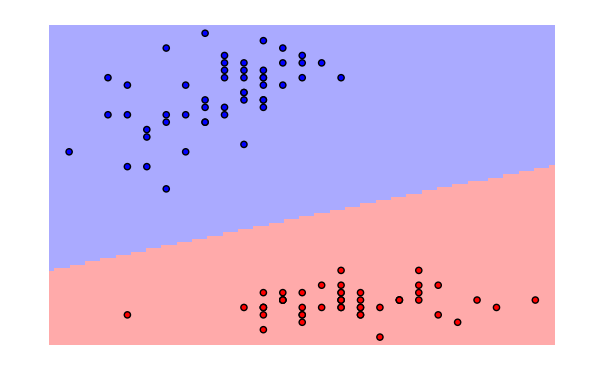

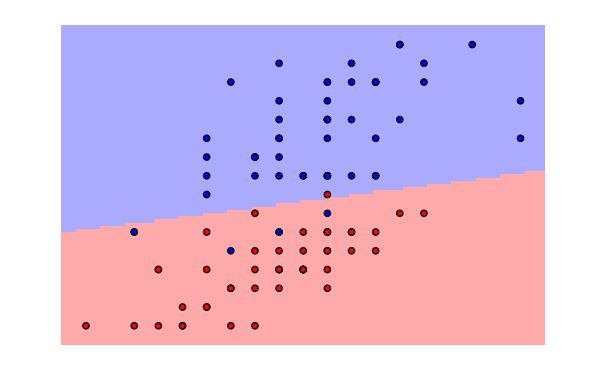

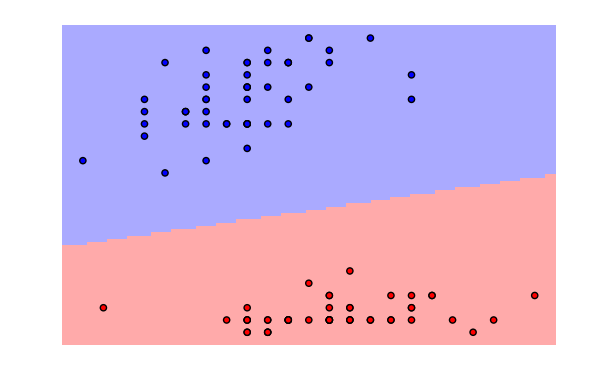

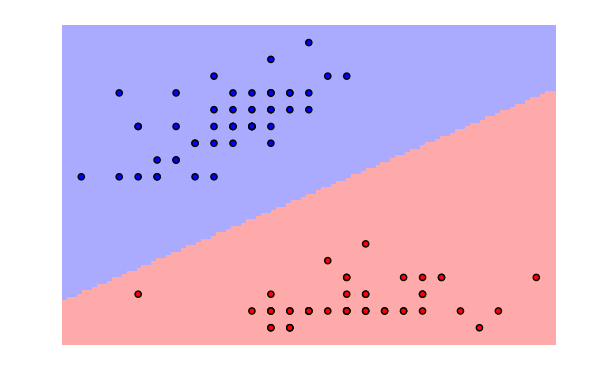

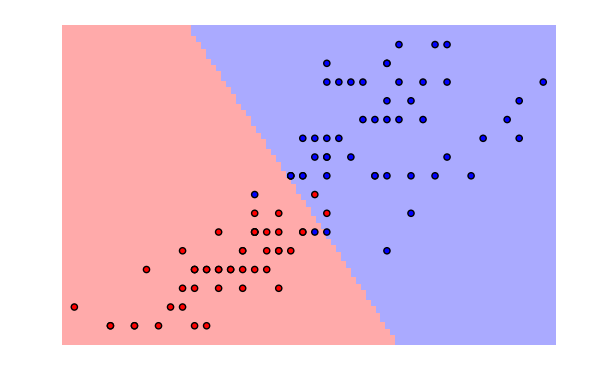

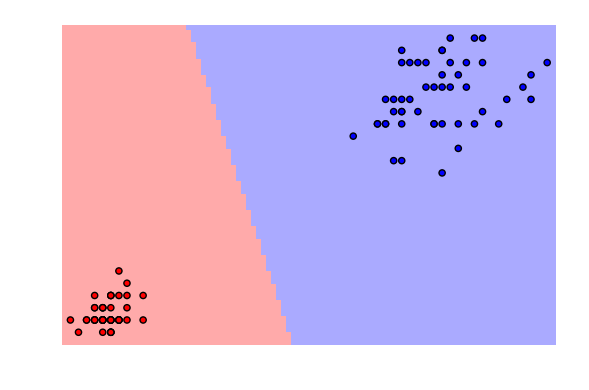

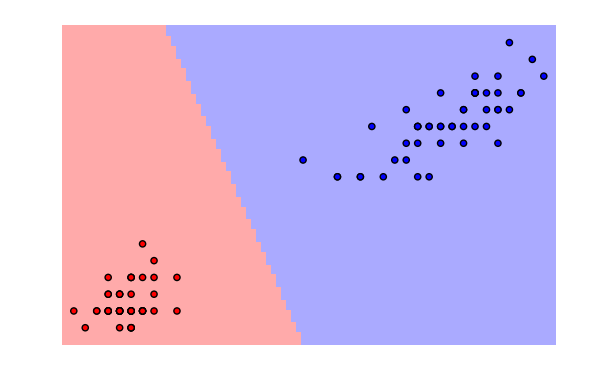

In [30]:
svc_models =[]
for field in field_combs:
    for flower in flowers:
        svc = svm.SVC(kernel='linear')
        X = iris.data[iris.target!=flower, :][:, field]
        y = iris.target[iris.target!=flower]
        model = svc.fit(X, y)
        svc_models.append(model)
        plot_estimator(svc, X, y)


### Run SVM code for classifying three flowers at a time. How is the code different?

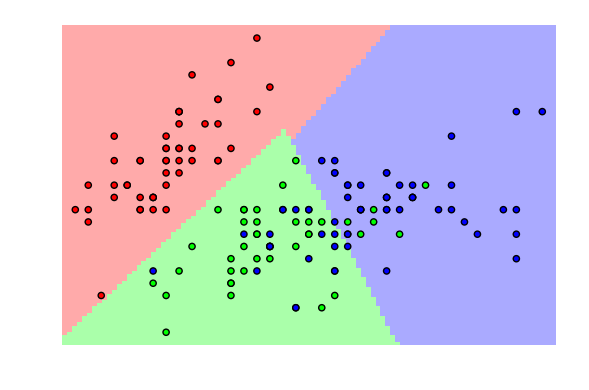

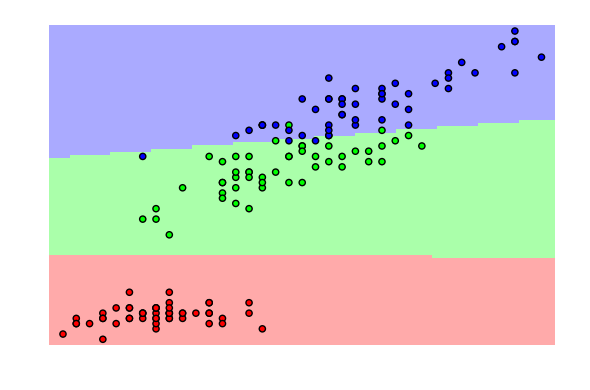

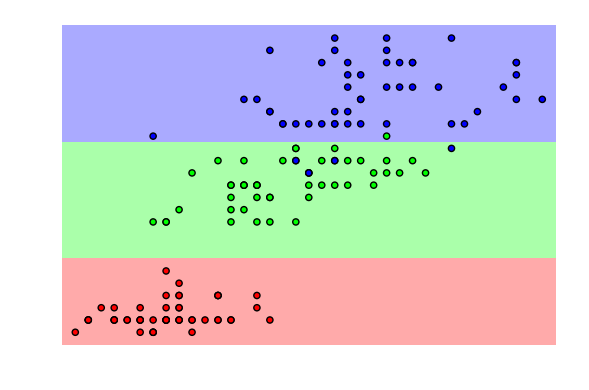

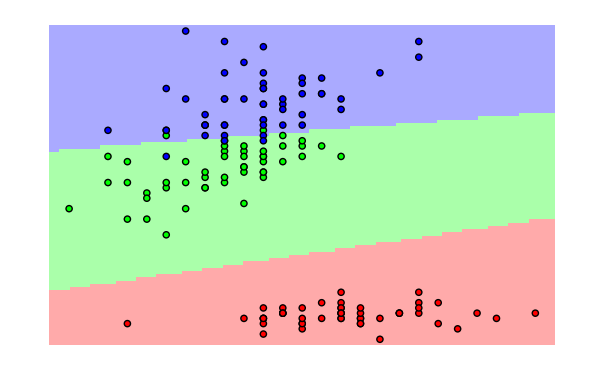

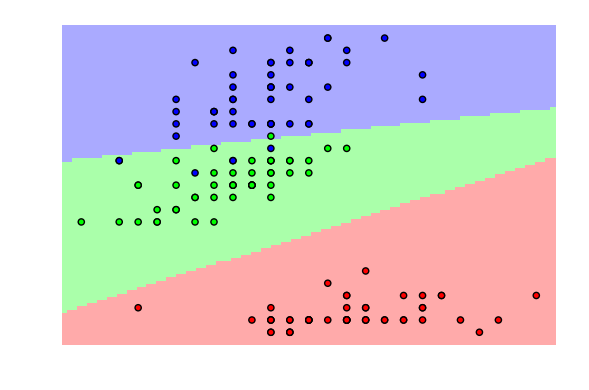

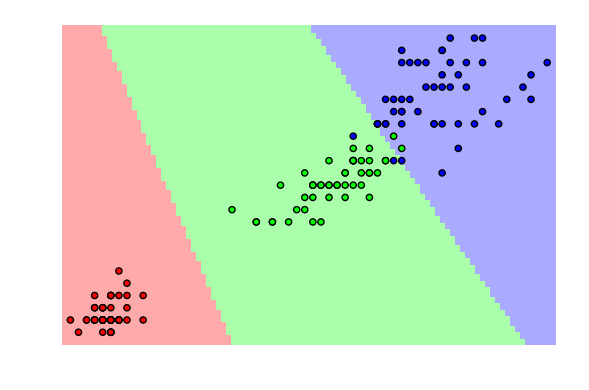

In [31]:
for field in field_combs:
    svc = svm.SVC(kernel='linear')
    X = iris.data[:, field]
    y = iris.target
    svc.fit(X, y)
    plot_estimator(svc, X, y)

### Try adjusting the code for a wider soft margin. 

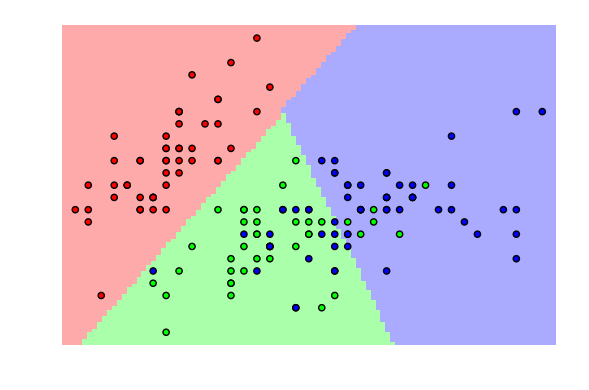

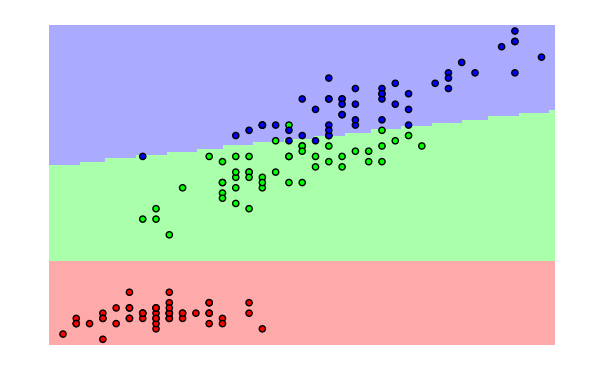

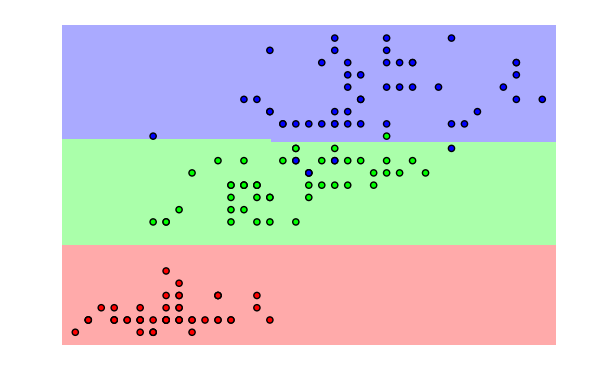

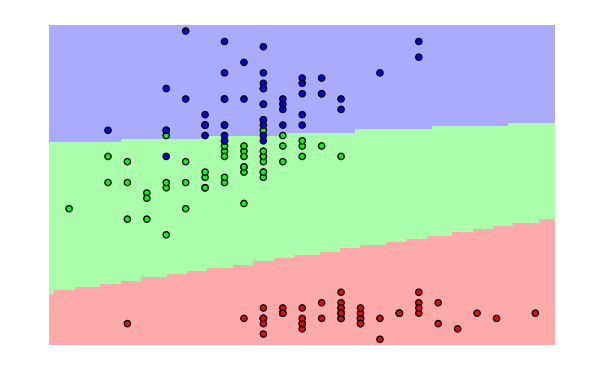

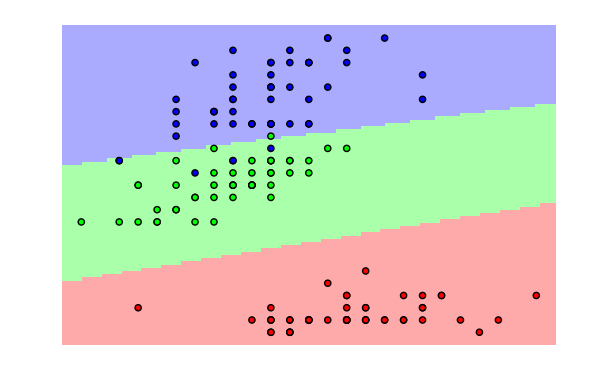

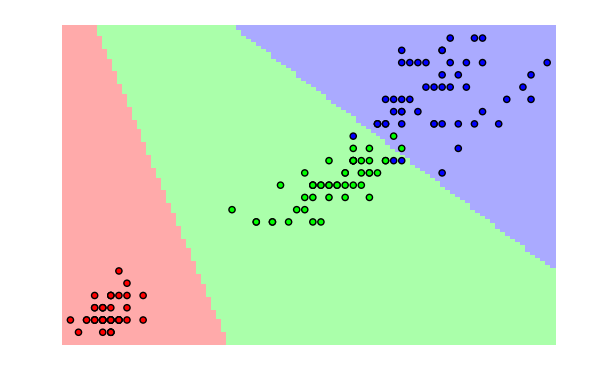

In [32]:
for field in field_combs:
    svc = svm.SVC(kernel='linear', C=10000)
    X = iris.data[:, field]
    y = iris.target
    svc.fit(X, y)
    plot_estimator(svc, X, y)
    